**Trabalhando com planilhas do excel**

In [ ]:
#importar a biblioteca pandas
import pandas as pd

In [4]:
#leitura dos arquivos
df1 = pd.read_excel('/content/drive/MyDrive/Datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/Datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/Datasets/Salvador.xlsx')

In [5]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
df2.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Fortaleza,2019-01-01,45.27,1002,2
1,Fortaleza,2019-01-01,115.61,1002,3
2,Fortaleza,2019-02-10,35.33,1004,3
3,Fortaleza,2019-02-10,20.95,1004,6
4,Fortaleza,2019-01-01,14.25,1004,6


In [7]:
df3.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Natal,2018-08-27,606.0,853,2
1,Natal,2018-11-25,563.0,853,2
2,Natal,2019-03-11,308.0,852,3
3,Natal,2019-01-07,271.0,854,3
4,Natal,2019-03-09,699.0,853,3


In [8]:
df4.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Recife,2019-01-01,162.61,981,1
1,Recife,2019-01-01,11.44,983,1
2,Recife,2019-02-10,12.94,983,5
3,Recife,2019-02-10,160.54,981,3
4,Recife,2019-02-14,19.89,983,7


In [9]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [10]:
#juntar todos os arquivos em um único dataframe
df = pd.concat([df1,df2,df3,df4,df5])

In [11]:
#retornando uma amostra aleatória do dataframe
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde
143,Salvador,2019-01-02,41.18,1037,2
195,Salvador,2019-01-02,44.89,1036,3
107,Natal,2019-01-02,14.70,1035,1
70,Recife,2019-01-01,20.40,983,7
126,Fortaleza,2019-03-02,41.87,980,8
55,Salvador,2019-01-01,36.62,1036,1
79,Recife,2019-01-01,14.53,983,6
53,Recife,2019-01-01,37.05,983,6
120,Aracaju,2018-01-01,7.73,1520,10
139,Recife,2019-03-02,141.16,980,7


In [12]:
#retornando o tipo de dados das colunas
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [13]:
#alterar o tipo de arquivo do campo LojaID de inteiro para string por não ser necessario realizar operações matemáticas
df['LojaID'] = df['LojaID'].astype("object")

In [14]:
#verificando se LojaID alterou de int para str
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [15]:
#consultando linhas com valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

**Criando novas colunas**

In [16]:
#criando a coluna receitas = vendas * qtde
df['Receita'] = df['Vendas'] * df['Qtde']

In [17]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [18]:
#retornar a maior receita
df['Receita'].max()

3544.0

In [19]:
#retornar a menor receita
df['Receita'].min()

3.34

In [20]:
#retornando os Top 3 com base na coluna Receita
df.nlargest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [21]:
#retornando as 3 Piores receitas 
df.nsmallest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [22]:
#retornando o valor da receita por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

**Trabalhando com datas**

In [23]:
#quando uma coluna é do tipo data, mas não está no tipo data, executar o comando pd.to_datetime

In [24]:
#retornar a receita por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [25]:
#criando uma nova coluna apenas com o ano da venda
df['Ano_Venda'] = df['Data'].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
176,Salvador,2019-01-02,19.42,1035,3,58.26,2019
162,Natal,2019-01-02,23.08,1036,2,46.16,2019
164,Natal,2019-01-02,6.59,1035,1,6.59,2019
140,Recife,2019-03-02,166.89,983,5,834.45,2019
97,Salvador,2019-01-01,39.91,1037,3,119.73,2019


In [26]:
#criando simultaneamente duas colunas, Dia_Venda e Mes_Venda
df['Dia_Venda'] ,df['Mes_Venda'] = df['Data'].dt.day , df['Data'].dt.month

In [27]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Dia_Venda,Mes_Venda
57,Natal,2019-02-24,425.00,854,4,1700.00,2019,24,2
146,Natal,2019-01-02,149.88,1037,1,149.88,2019,2,1
9,Fortaleza,2019-01-01,11.17,1002,6,67.02,2019,1,1
82,Fortaleza,2019-01-01,14.03,1004,5,70.15,2019,1,1
40,Salvador,2019-02-13,161.87,1036,3,485.61,2019,13,2
42,Fortaleza,2019-01-01,38.71,1004,5,193.55,2019,1,1
57,Aracaju,2018-01-01,23.49,1520,7,164.43,2018,1,1
133,Recife,2019-03-02,14.67,980,7,102.69,2019,2,3
116,Salvador,2019-03-02,41.78,1034,3,125.34,2019,2,3
15,Recife,2019-01-01,7.45,981,2,14.90,2019,1,1


In [28]:
#retornar todas as vendas realizadas no ano de 2019 e no mês de março
filtro_ano = df['Ano_Venda'] == 2019
filtro_mes = df['Mes_Venda'] == 3
df.loc[filtro_ano & filtro_mes]

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Dia_Venda,Mes_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,2019,2,3
109,Fortaleza,2019-03-02,18.90,982,6,113.40,2019,2,3
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,2,3
111,Fortaleza,2019-03-02,8.00,981,3,24.00,2019,2,3
112,Fortaleza,2019-03-02,133.59,982,1,133.59,2019,2,3
...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,2,3
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,2,3
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,2,3
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,2,3


**Visualização de Dados**

In [29]:
#retornar o total de vendas por Loja
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

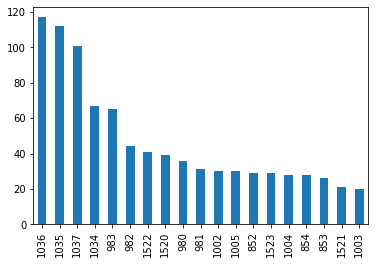

In [30]:
#montar o gráfico do número de vendas por loja
df['LojaID'].value_counts(ascending=False).plot.bar();

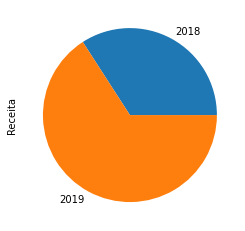

In [31]:
#gráfico de pizza de venda por ano
df.groupby('Ano_Venda')['Receita'].sum().plot.pie();

In [32]:
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Dia_Venda,Mes_Venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1
5,Aracaju,2018-01-01,156.20,1522,1,156.20,2018,1,1
6,Aracaju,2018-01-01,35.50,1522,2,71.00,2018,1,1
7,Aracaju,2019-01-01,172.22,1522,6,1033.32,2019,1,1
8,Aracaju,2019-01-01,12.16,1523,1,12.16,2019,1,1
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1


In [33]:
#total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

In [34]:
#retornar o total de linhas e colunas (informações do dataframe)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 239
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Cidade     894 non-null    object        
 1   Data       894 non-null    datetime64[ns]
 2   Vendas     894 non-null    float64       
 3   LojaID     894 non-null    object        
 4   Qtde       894 non-null    int64         
 5   Receita    894 non-null    float64       
 6   Ano_Venda  894 non-null    int64         
 7   Dia_Venda  894 non-null    int64         
 8   Mes_Venda  894 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 69.8+ KB


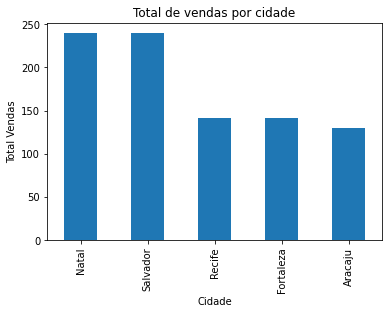

In [35]:
#total de vendas por cidade no gráfico
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');

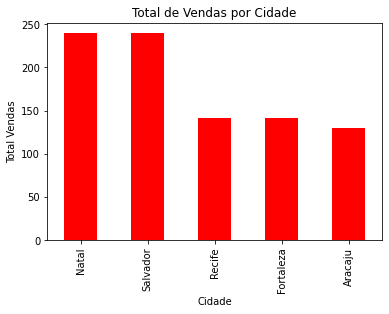

In [36]:
#alterando a cor do gráfico de barras
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total Vendas');